In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import os
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
# -값이 깨지는 문제 해결을 위해 파라미터값 설정    
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [2]:
os.listdir('../data/')

['.ipynb_checkpoints',
 '국내선_노선별_통계_20221121092027.xlsx',
 '국제선_지역별_통계_20221121092121.xlsx',
 '서울시 나눔카 월별 대여량 정보.csv',
 '수입차(승용일반형)+등록.xlsx',
 '연령_및_성별_인구_–_읍면동_연도_끝자리_0_5___시군구_그_외_연도__20221118091820.xlsx',
 '인구_가구_및_주택_–_읍면동_연도_끝자리_0_5___시군구_그_외_연도__20221118091813.xlsx',
 '자동차+단속현황_2010-2021.xlsx',
 '자동차+등록현황(연료별).xlsx',
 '자동차등록_월별__구별__2010-2011.xlsx',
 '자동차등록_월별_구별__2012-2020.xlsx',
 '자전거도로+현황(2013년+이후)_2013-2014.xlsx',
 '자전거도로_현황_2010-2012.xlsx',
 '자전거도로_현황_2015-2020.xlsx',
 '전기차충전소_충전기_정보.csv',
 '주차장_구별__2011-2013.xlsx',
 '주차장_구별__2014-2015.xlsx',
 '주차장_구별__2016-2020.xlsx',
 '지하철수송_2010-2021.xlsx',
 '총인구_2010.xlsx',
 '총인구_2015-2021.xlsx']

# 1. 교통사고현황_연령별

In [3]:
file = pd.read_excel('../data/교통사고현황_연령별_2012-2021.xlsx', sheet_name='data')

FileNotFoundError: [Errno 2] No such file or directory: '../data/교통사고현황_연령별_2012-2021.xlsx'

In [ ]:
len(file['자치구별(2)'].unique())

In [ ]:
file.drop(columns=['자치구별(1)', '연령별(1)'], inplace=True)

In [ ]:
file.replace({'-' : np.nan}, inplace=True)

In [ ]:
file.head()

In [ ]:
dead_col = [col for col in file.columns if '사망자' in col]
injured_col = [col for col in file.columns if '부상자' in col]

In [ ]:
init_df = file.iloc[:, :2]

In [4]:
dead_df = file.loc[:, dead_col]

NameError: name 'file' is not defined

In [5]:
injured_df = file.loc[:, injured_col]

NameError: name 'file' is not defined

In [6]:
dead_df = pd.concat([init_df, dead_df], axis = 1)

NameError: name 'init_df' is not defined

In [13]:
injured_df = pd.concat([init_df, injured_df], axis = 1)

## 1.1 교통사고 사망자수

In [14]:
dead_T = dead_df[(dead_df['연령별(2)'] == '소계')& (dead_df['자치구별(2)'] != '소계')].T

In [15]:
dead_T.head()

,13,26,39,52,65,78,91,104,117,130,...,208,221,234,247,260,273,286,299,312,325
자치구별(2),종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
연령별(2),소계,소계,소계,소계,소계,소계,소계,소계,소계,소계,...,소계,소계,소계,소계,소계,소계,소계,소계,소계,소계
2012 사망자수,12.0,12.0,11.0,6.0,17.0,20.0,11.0,11.0,9.0,16.0,...,25.0,21.0,21.0,32.0,14.0,20.0,25.0,25.0,14.0,18.0
2013 사망자수,13.0,10.0,13.0,8.0,10.0,16.0,9.0,9.0,10.0,8.0,...,26.0,19.0,10.0,29.0,11.0,20.0,19.0,31.0,21.0,12.0
2014 사망자수,11.0,7.0,8.0,11.0,12.0,27.0,11.0,17.0,12.0,14.0,...,32.0,19.0,13.0,26.0,13.0,22.0,13.0,17.0,24.0,14.0


In [16]:
dead_T.columns = dead_T.iloc[0, :]
dead_T.drop(['자치구별(2)', '연령별(2)'], axis= 0, inplace=True)

In [17]:
dead_T.head()

자치구별(2),종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2012 사망자수,12.0,12.0,11.0,6.0,17.0,20.0,11.0,11.0,9.0,16.0,...,25.0,21.0,21.0,32.0,14.0,20.0,25.0,25.0,14.0,18.0
2013 사망자수,13.0,10.0,13.0,8.0,10.0,16.0,9.0,9.0,10.0,8.0,...,26.0,19.0,10.0,29.0,11.0,20.0,19.0,31.0,21.0,12.0
2014 사망자수,11.0,7.0,8.0,11.0,12.0,27.0,11.0,17.0,12.0,14.0,...,32.0,19.0,13.0,26.0,13.0,22.0,13.0,17.0,24.0,14.0
2015 사망자수,8.0,8.0,18.0,8.0,17.0,16.0,16.0,19.0,16.0,8.0,...,12.0,19.0,10.0,28.0,7.0,12.0,20.0,20.0,16.0,23.0
2016 사망자수,9.0,17.0,12.0,15.0,9.0,14.0,9.0,13.0,15.0,11.0,...,13.0,9.0,15.0,22.0,19.0,19.0,16.0,12.0,14.0,17.0


In [18]:
gu = list(dead_T.columns)

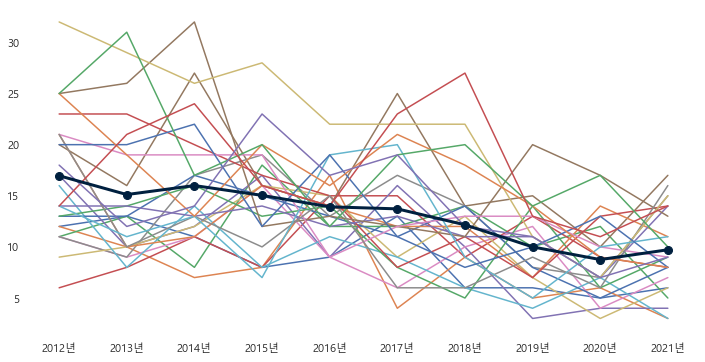

In [19]:
fig, ax = plt.subplots(figsize = (12,6))

x = [idx[:4]+'년' for idx in dead_T.index]
ax.set_facecolor('white')

# ax.plot(x, dead_T.loc[:, '종로구'], label = '종로구')

for g in gu :
    ax.plot(x, dead_T.loc[:, g], label = g)
    
ax.plot(x, dead_T.mean(axis=1), label = '전체', marker = 'o', markersize = 8, color = '#00203F', linewidth = 3)

In [20]:
# dead_T.mean(axis=1)

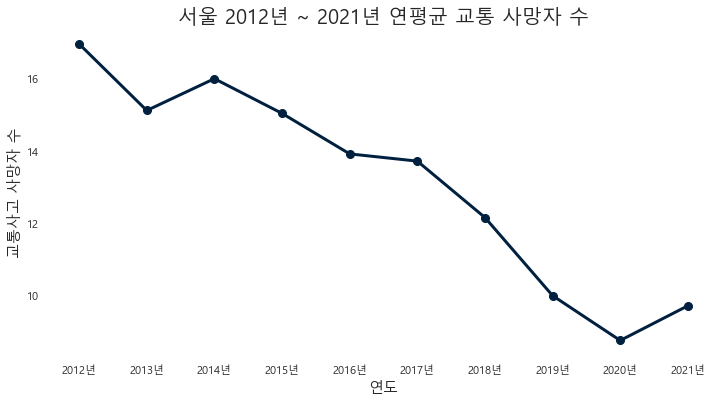

In [21]:
pd.DataFrame(dead_T.mean()).head()


fig, ax = plt.subplots(figsize = (12,6))
ax.set_facecolor('white')
x = [idx[:4]+'년' for idx in dead_T.index]

# ax.plot(x, dead_T.loc[:, '종로구'], label = '종로구')
ax.plot(x, dead_T.mean(axis=1), label = '전체', marker = 'o', markersize = 8, color = '#00203F', linewidth = 3)

plt.title('서울 2012년 ~ 2021년 연평균 교통 사망자 수', fontsize = 20)
plt.xlabel('연도', fontsize = 15)
plt.ylabel('교통사고 사망자 수', fontsize = 15)

plt.show()

## 1.2 교통사고 부상자 수 

In [22]:
injured_T = injured_df[(injured_df['연령별(2)'] == '소계')& (injured_df['자치구별(2)'] != '소계')].T

In [23]:
injured_T.columns = injured_T.iloc[0, :]
injured_T.drop(['자치구별(2)', '연령별(2)'], axis= 0, inplace=True)

In [24]:
gu = list(injured_T.columns)

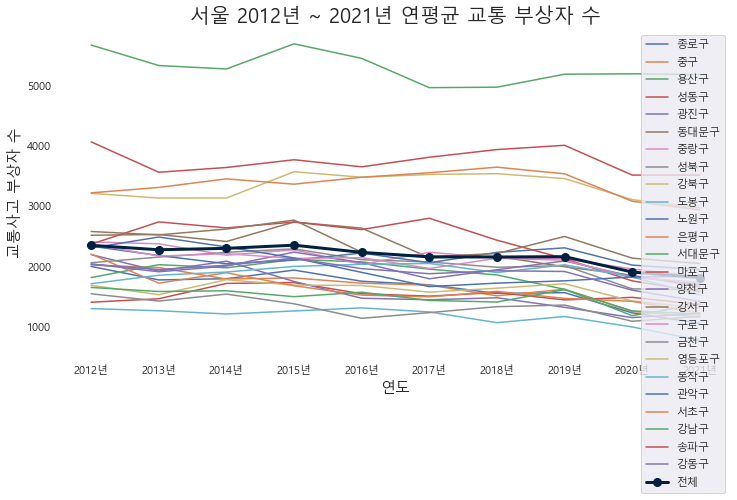

In [25]:
fig, ax = plt.subplots(figsize = (12,6))

x = [idx[:4]+'년' for idx in injured_T.index]
ax.set_facecolor('white')

# ax.plot(x, dead_T.loc[:, '종로구'], label = '종로구')

for g in gu :
    ax.plot(x, injured_T.loc[:, g], label = g)
    
ax.plot(x, injured_T.mean(axis=1), label = '전체', marker = 'o', markersize = 8, color = '#00203F', linewidth = 3)

plt.title('서울 2012년 ~ 2021년 연평균 교통 부상자 수', fontsize = 20)
plt.xlabel('연도', fontsize = 15)
plt.ylabel('교통사고 부상자 수', fontsize = 15)

plt.legend()
plt.show()

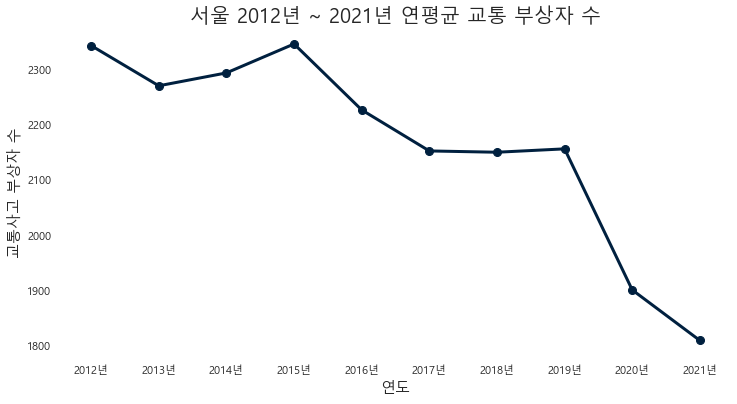

In [26]:
fig, ax = plt.subplots(figsize = (12,6))
ax.set_facecolor('white')
x = [idx[:4]+'년' for idx in injured_T.index]

# ax.plot(x, dead_T.loc[:, '종로구'], label = '종로구')
ax.plot(x, injured_T.mean(axis=1), label = '전체', marker = 'o', markersize = 8, color = '#00203F', linewidth = 3)

plt.title('서울 2012년 ~ 2021년 연평균 교통 부상자 수', fontsize = 20)
plt.xlabel('연도', fontsize = 15)
plt.ylabel('교통사고 부상자 수', fontsize = 15)

plt.show()

# 2. 교통사고현황_사고유형별

In [27]:
file  = pd.read_excel('../data/교통사고현황_사고유형별_2012-2021.xlsx', sheet_name='data')

In [28]:
file['사고유형별(2)'].unique()

array(['소계'], dtype=object)

In [29]:
file.drop(columns=['자치구별(1)', '사고유형별(2)'], axis = 1, inplace=True)

In [30]:
file.replace({'-' : np.nan}, inplace=True)

In [31]:
file.head(30)

,자치구별(2),사고유형별(1),구분별(1),2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,소계,합계,발생건수 (건),40829.0,39439.0,40792.0,41665.0,40039.0,38625.0,38795.0,39258.0,35227.0,33913.0
1,소계,합계,사망자수 (명),424.0,378.0,400.0,376.0,348.0,343.0,304.0,250.0,219.0,243.0
2,소계,합계,부상자수 (명),58583.0,56761.0,57345.0,58656.0,55669.0,53810.0,53751.0,53904.0,47513.0,45223.0
3,소계,차대사람,발생건수 (건),10892.0,10683.0,11118.0,11318.0,10683.0,10249.0,9978.0,9896.0,7671.0,7075.0
4,소계,차대사람,사망자수 (명),235.0,215.0,214.0,211.0,196.0,189.0,182.0,139.0,113.0,120.0
5,소계,차대사람,부상자수 (명),11383.0,11159.0,11621.0,11831.0,11144.0,10706.0,10402.0,10320.0,7996.0,7332.0
6,소계,차대차,발생건수 (건),28537.0,27358.0,28201.0,28854.0,28030.0,27103.0,27522.0,28150.0,26508.0,25926.0
7,소계,차대차,사망자수 (명),136.0,121.0,150.0,116.0,120.0,117.0,96.0,84.0,80.0,92.0
8,소계,차대차,부상자수 (명),45582.0,43928.0,44016.0,45086.0,42936.0,41642.0,41889.0,42181.0,38373.0,36909.0
9,소계,차량단독,발생건수 (건),1399.0,1398.0,1473.0,1493.0,1326.0,1273.0,1295.0,1212.0,1048.0,912.0


## 2.1 차대사람/차대차/차량단독 사고

In [32]:
_df = file.groupby(['사고유형별(1)', '구분별(1)']).mean()

In [33]:
accidents = ['차대사람', '차대차', '차량단독']
sort = list(file['구분별(1)'].unique())

In [34]:
# _df.columns

sort

['발생건수 (건)', '사망자수 (명)', '부상자수 (명)']

In [40]:
x
accidents

['차대사람', '차대차', '차량단독']

In [74]:
idx = [idx for idx in _df.index if idx[0] == '차대사람']
_df.loc[idx, :]

2012        2013        2014        2015        2016  \
사고유형별(1) 구분별(1)                                                                 
차대사람     발생건수 (건)  837.846154  821.769231  855.230769  870.615385  821.769231   
         부상자수 (명)  875.615385  858.384615  893.923077  910.076923  857.230769   
         사망자수 (명)   18.076923   16.538462   16.461538   16.230769   15.076923   

                         2017        2018        2019        2020        2021  
사고유형별(1) 구분별(1)                                                                
차대사람     발생건수 (건)  788.384615  767.538462  761.230769  590.076923  544.230769  
         부상자수 (명)  823.538462  800.153846  793.846154  615.076923  564.000000  
         사망자수 (명)   14.538462   14.000000   10.692308    8.692308    9.230769

In [78]:
_df.loc[idx, :].index

MultiIndex([('차대사람', '발생건수 (건)'),
            ('차대사람', '부상자수 (명)'),
            ('차대사람', '사망자수 (명)')],
           names=['사고유형별(1)', '구분별(1)'])

In [126]:
def draw_accidents_plot(accident, _df):
    fig, ax = plt.subplots(figsize = (10, 6))
    
    ax.set_facecolor('white')
    
    idx = [idx for idx in _df.index if idx[0] == accident]
    
    _def_df = _df.loc[idx, :]
    _df_index = _df.index
    
    clr = ['#fdb863', '#b2abd2','#b8e186']
#     ax.title(f'{accident} 사고 부상자/사망자수 및 발생건수')

    for i, v in enumerate(_def_df.index):

        ax.plot(x, _df.loc[v, :], linewidth = 3, marker = 'o', color = clr[i], label = v[1])
        
#         ax.title(f'{accident} 사고 부상자/사망자수 및 발생건수')
        ax.legend(loc = 'upper right')
    plt.title(f'{accident} 사고 부상자/사망자수 및 발생건수', fontsize = 15)
    plt.ylabel('수', fontsize = 10)
    plt.xlabel('연도', fontsize = 10)
    plt.show()

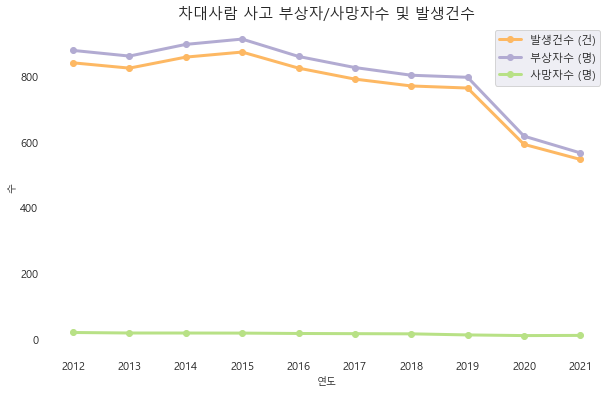

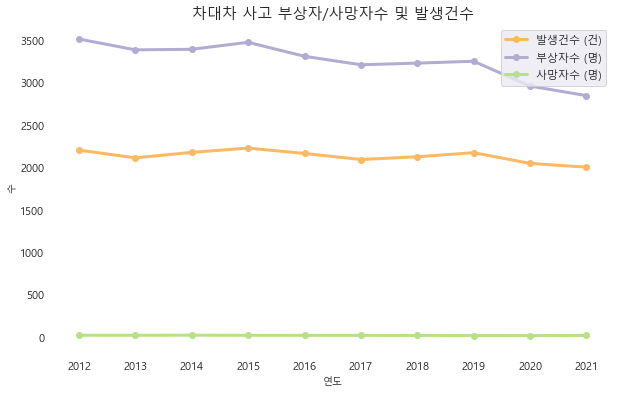

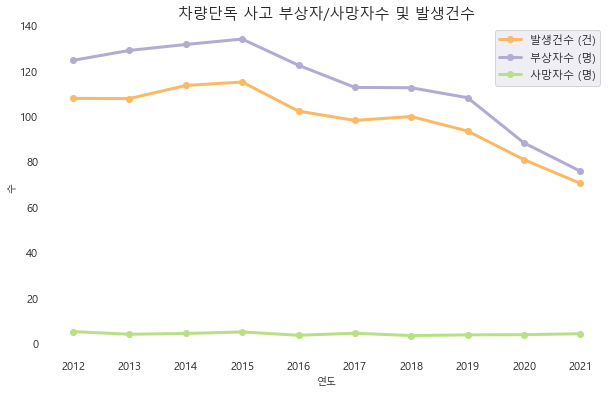

In [127]:
for a in accidents:
    draw_accidents_plot(a, _df)

# 교통사고현황_노인

In [128]:
file  = pd.read_excel('../data/교통사고현황_노인_2012-2021.xlsx', sheet_name='data')

In [129]:
file

,자치구별(1),자치구별(2),2012 노인 교통사고,2012 노인 교통사고.1,2012 노인 교통사고.2,2012 노인운전자 교통사고,2012 노인운전자 교통사고.1,2012 노인운전자 교통사고.2,2012 노인 보행자 사상자,2012 노인 보행자 사상자.1,...,2020 노인 보행자 사상자,2020 노인 보행자 사상자.1,2021 노인 교통사고,2021 노인 교통사고.1,2021 노인 교통사고.2,2021 노인운전자 교통사고,2021 노인운전자 교통사고.1,2021 노인운전자 교통사고.2,2021 노인 보행자 사상자,2021 노인 보행자 사상자.1
0,자치구별(1),자치구별(2),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),사망자수 (명),부상자수 (명),...,사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),사망자수 (명),부상자수 (명)
1,서울시,소계,4197,144,4268,2939,43,3976,108,1749,...,59,1767,4829,103,5027,5371,50,6986,69,1674
2,서울시,종로구,144,4,149,121,2,159,3,66,...,2,56,122,3,125,142,3,185,2,42
3,서울시,중구,143,5,143,125,-,158,5,58,...,1,66,126,1,130,154,1,190,1,43
4,서울시,용산구,119,2,121,77,1,109,2,47,...,4,28,126,2,132,137,-,189,1,31
5,서울시,성동구,106,-,111,84,-,114,-,46,...,5,54,144,4,143,150,2,200,3,52
6,서울시,광진구,140,7,143,95,1,143,6,54,...,2,29,104,-,113,153,-,197,-,44
7,서울시,동대문구,248,5,253,174,2,218,4,115,...,1,128,282,12,281,266,5,304,9,106
8,서울시,중랑구,217,5,223,137,1,170,5,86,...,3,97,191,2,198,195,1,251,2,71
9,서울시,성북구,182,6,185,137,1,178,5,81,...,2,109,194,3,200,232,1,297,1,79
